# **Assignment 2**

In [6]:
import warnings
warnings.filterwarnings('ignore')
import importlib
import tensorflow as tf

# Ensure this runs before any TensorFlow operations
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print("here")
        print(e)

import os
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/lib/cuda'

## **Preprocessing & Augmentation**

2024-03-23 16:32:09.009295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


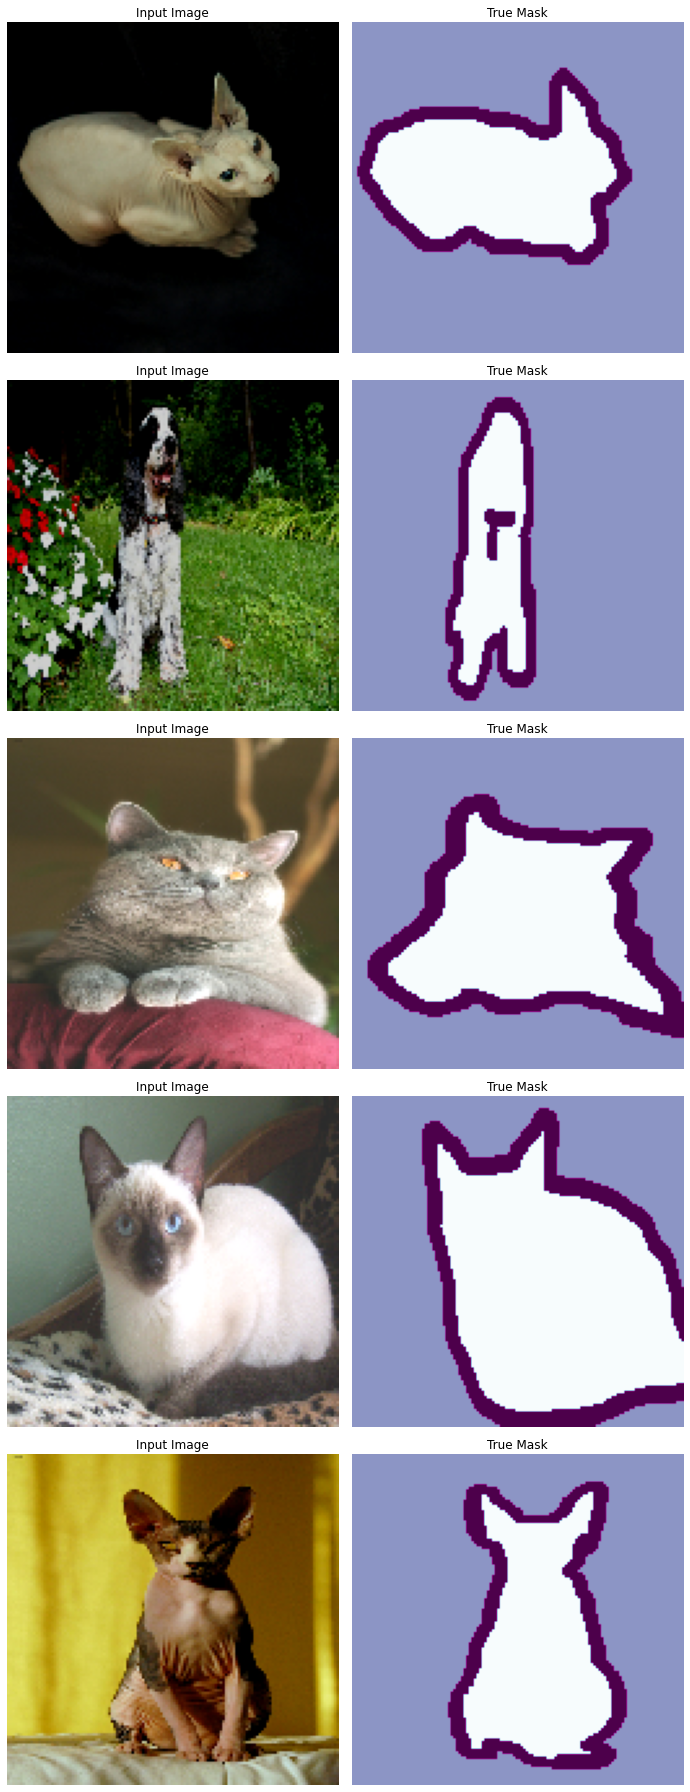

In [13]:
import preprocessing as preprocessing
importlib.reload(preprocessing)

dataset_train, dataset_val, dataset_test = preprocessing.create_data()

preprocessing.display_sample_images(dataset_train, samples=5)
#preprocessing.display_sample_images(dataset_val, samples=5)

#preprocessing.check_image_dimensions(dataset_train)
#preprocessing.check_image_dimensions(dataset_val)



## **Training**

Reloading Tuner from ../models/unet_tuning/tuner0.json
Epoch 1/2
 67/368 ━━━━━━━━━━━━━━━━━━━━ 1:37 325ms/step - accuracy: 0.5805 - loss: 0.8854

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


 68/368 ━━━━━━━━━━━━━━━━━━━━ 1:37 325ms/step - accuracy: 0.5812 - loss: 0.8844

Corrupt JPEG data: premature end of data segment


368/368 ━━━━━━━━━━━━━━━━━━━━ 131s 344ms/step - accuracy: 0.6627 - loss: 0.7557 - val_accuracy: 0.6799 - val_loss: 0.7925
Epoch 2/2
 66/368 ━━━━━━━━━━━━━━━━━━━━ 1:37 322ms/step - accuracy: 0.7623 - loss: 0.5820

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


 67/368 ━━━━━━━━━━━━━━━━━━━━ 1:36 322ms/step - accuracy: 0.7623 - loss: 0.5819

Corrupt JPEG data: premature end of data segment


368/368 ━━━━━━━━━━━━━━━━━━━━ 127s 345ms/step - accuracy: 0.7688 - loss: 0.5680 - val_accuracy: 0.7802 - val_loss: 0.5612


92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.7775 - loss: 0.5704
Validation Loss: 0.55860435962677
Validation Accuracy: 0.7812921404838562


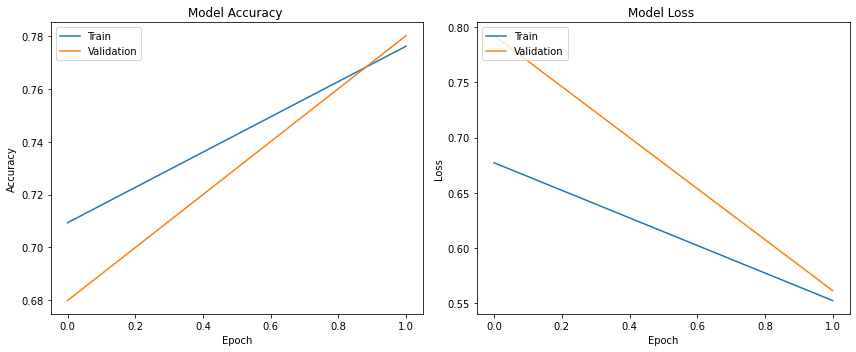

In [8]:
import training
importlib.reload(training)

best_model, history = training.get_best_model(dataset_train, dataset_val)

training.evaluate_model_performance(best_model, dataset_val)
training.plot_training_history(history)



In [18]:
print(history.history['val_loss'])  # For validation loss
print(history.history['val_accuracy'])  # For validation accuracy

best_model.summary()

[0.7924584746360779, 0.5611861348152161]
[0.6798830628395081, 0.780210554599762]


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_10 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 128, 128,  │      9,248 │ re_lu_10[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_11 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ re_lu_11[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_12 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 64, 64,    │     36,928 │ re_lu_12[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 32,    │          0 │ re_lu_13[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_15[0][0] 

 Total params: 1,419,979 (5.42 MB)

 Trainable params: 472,899 (1.80 MB)

 Non-trainable params: 1,280 (5.00 KB)

 Optimizer params: 945,800 (3.61 MB)

## **Prediction**

459/459 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━

2024-03-23 16:47:48.002779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


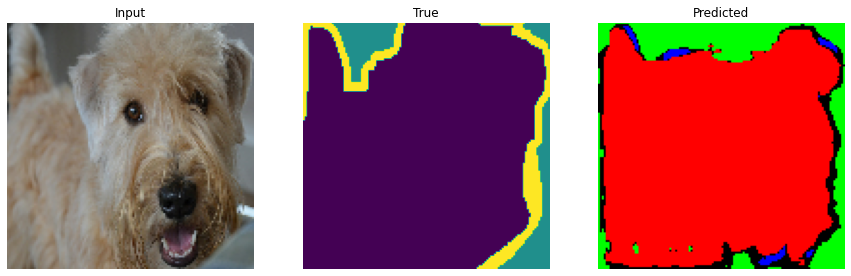

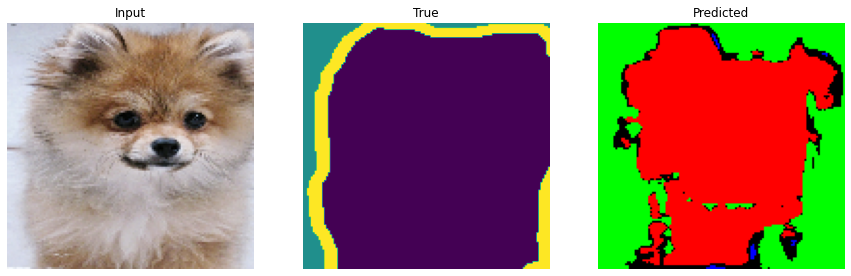

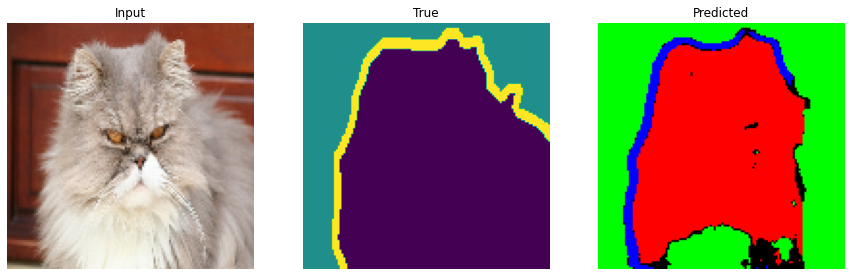

Worst Predictions:


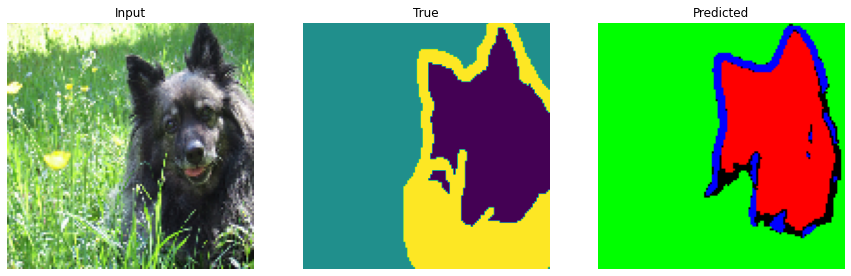

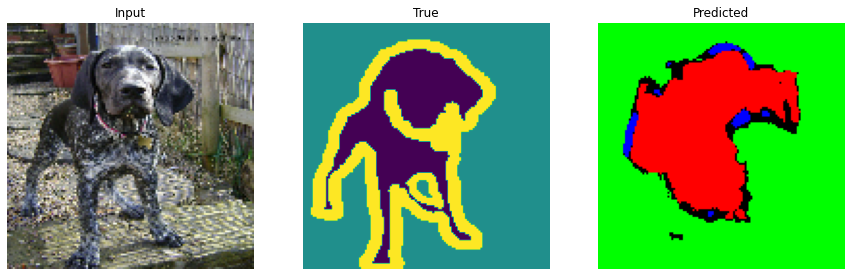

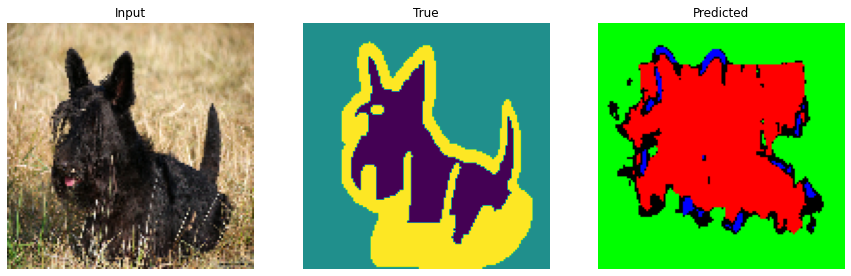

In [15]:
import prediction
importlib.reload(prediction)

prediction.prediction(best_model, dataset_test)

## **Validation**

In [23]:
import validation
importlib.reload(validation)

validation.validation(best_model, dataset_test)

TypeError: validation() got an unexpected keyword argument 'last_conv_layer_name'